In [1]:
import pandas as pd
import numpy as np
import folium
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from math import sqrt
%matplotlib inline

C:\Users\test\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [440]:
df=pd.read_csv("bigddf.csv")

In [ ]:
x=df.iloc[:, 1:7]
df=df.drop(x, axis=1)

In [ ]:
census=pd.read_csv("dcensus.csv")

In [ ]:
census=census.set_index("new_nhood")

In [ ]:
df=df.set_index("neighborhood")

In [ ]:
df=pd.concat([df, census], axis=1)
# add in census data

In [2]:
df=pd.read_csv("modelingdetroitdata.csv") #creata a new dataset

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, random_state=0)
from sklearn.model_selection import train_test_split
#imported some things from sklearn

In [5]:
#some other response variables I tried
othery=df[['avgwaittimeimprovdtickets', 'averageyearofhousingbuilt','avglenconstruction', 'avgestimatedcostofbuilding', 'totalmurders', 'inspections2016']]

In [215]:
df.columns=df.columns.str.replace("Estimate; ", "")
df.columns=df.columns.str.replace(" - ", ".")
df.columns=df.columns.str.replace(" ", "") #making the dataframe columns easier to use
#fixing some issues

In [6]:
df=df.replace(np.nan, 0)
df=df.replace([np.inf, -np.inf], 0)
#make it possible to use the dataset

In [7]:
#the first set of response variables
y=df[['blightvio2010s', '2016assessmentvalue', 'totalbuildingspermitted', 'newbuildings','PLACEOFBIRTH.Totalpopulation',
   'EMPLOYMENTSTATUS.Population16yearsandover.Inlaborforce','COMMUTINGTOWORK.Meantraveltimetowork(minutes)', 'INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Totalhouseholds.Medianhouseholdincome(dollars)',
 'INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Totalhouseholds.Meanhouseholdincome(dollars)', '2016totals', 'HOUSINGOCCUPANCY.Totalhousingunits', 'MORTGAGESTATUS.Owner-occupiedunits', 'blight_violations', 'TotalAuctions', 'improveticketsperneighborhood', 'PLACEOFBIRTH.Totalpopulation.Foreignborn', 'LANGUAGESPOKENATHOME.Population5yearsandover.LanguageotherthanEnglish','INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Totalhouseholds', 'GROSSRENT.Occupiedunitspayingrent.Median(dollars)','totalmurders','avgestimatedcostofbuilding', "blight_violations"  
]]

In [10]:
othery=othery.replace(np.nan, 0)

# Total permits issued to buildings

In [119]:
tbp=df.drop(["totalbuildingspermitted", "2017permitsissued", "2016permitsissued", "2015permitsissued",
            "2014permitsissued", "2013permitsissued", "2012permitsissued", "2011permitsissued",
            "2010permitsissued"], axis=1)

In [120]:
y.totalbuildingspermitted.mean()

236.90338164251207

In [121]:
res=lasso(tbp, y.totalbuildingspermitted, [0.1, 1, 10]) #best model

Best alpha: 1.0
Number of features used: 351
Root Mean Squared Error on train data: 3.288720860062762
Root Mean Squared Error on test data: 54.22650323648159


In [134]:
tbp=tbp.rename(columns= {"ROBBERY20112011":"ROBBERY2011", "BURGLARY20112011": "BURGLARY2011", "SELECTEDMONTHLYOWNERCOSTSASAPERCENTAGEOFHOUSEHOLDINCOME(SMOCAPI).Housingunitwithoutamortgage(excludingunitswhereSMOCAPIcannotbecomputed).Lessthan10.0percent": "SMOCAPI.Housingunitswithoutamortage<10%",
                        "INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Totalhouseholds.$100,000to$149,999":"INCOMEANDBENEFITSHOUSEHOLD(100-150,000)","INDUSTRY.Civilianemployedpopulation16yearsandover.Otherservices,exceptpublicadministration": "INDUSTRY.OtherServices"})

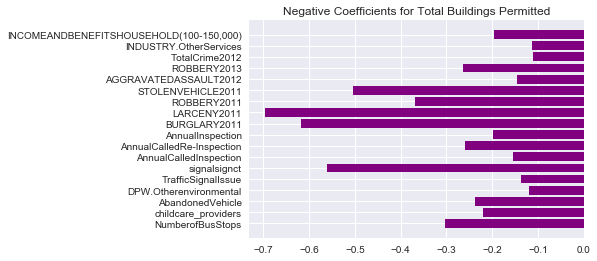

In [135]:
features=tbp.columns[res < -0.1]
coefficients=list(res[res < -0.1])
n_features = tbp.columns[res < -0.1].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="purple")
plt.yticks(np.arange(n_features), features)
plt.title("Negative Coefficients for Total Buildings Permitted")

In [124]:
tbp=tbp.rename(columns={"STOLENVEHICLE2014": "StolenVehicle2014", "ReferredtoEnviron.Protectio": "ReftoDEP"})

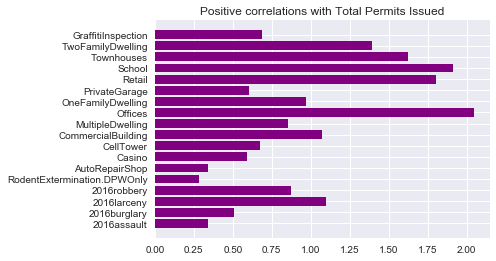

In [126]:
features=tbp.columns[res > 0.25]
coefficients=list(res[res > 0.25])
n_features = tbp.columns[res > 0.25].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="purple")
plt.yticks(np.arange(n_features), features)
plt.title("Positive correlations with Total Permits Issued")

# Population

Accurate model, but ultimately, didn't tell me very much

In [22]:
tp=df.drop(["PLACEOFBIRTH.Totalpopulation", "ANCESTRY.Totalpopulation"], axis=1)

In [23]:
ytp=y["PLACEOFBIRTH.Totalpopulation"]

In [297]:
ytp.mean()

2589.4444444444443

In [25]:
res=lr(tp, ytp)

Mean Squared Error from Linear Regression: 12.403982482634772


([<matplotlib.axis.YTick at 0x1775886b7f0>,
 <a list of 17 Text yticklabel objects>)

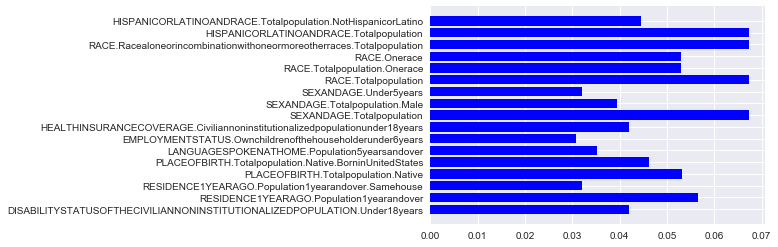

In [34]:
features=tp.columns[res > 0.03]
coefficients=list(res[res > 0.03])
n_features = tp.columns[res > 0.03].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="blue")
plt.yticks(np.arange(n_features), features)

([<matplotlib.axis.YTick at 0x17756251710>,
 <a list of 23 Text yticklabel objects>)

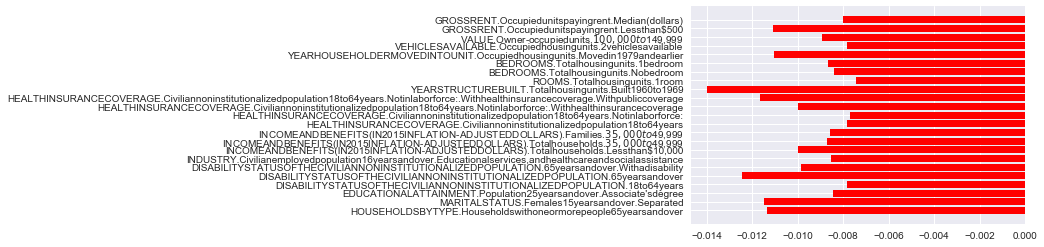

In [27]:
features=tp.columns[res < -0.007]
coefficients=list(res[res < -0.007])
n_features = tp.columns[res < -0.007].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="red")
plt.yticks(np.arange(n_features), features)

# Commuting

Looked at average commute time, which was helpful and I could predict it fairly well, but ultimately, didn't seem worth reporting

In [147]:
com=df.drop(['COMMUTINGTOWORK.Meantraveltimetowork(minutes)'], axis=1)
ycom=y['COMMUTINGTOWORK.Meantraveltimetowork(minutes)']

In [ ]:
ycom.mean()

In [ ]:
res=gbr(fscom, ycom, [1,2,3,4,5], .75) #best model
features=fscom.columns[res > 0.012]
coefficients=list(res[res > 0.012])
n_features = fscom.columns[res > 0.012].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="red")
plt.yticks(np.arange(n_features), features)

# Mean Household Income

In [58]:
income=df.drop(['INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Totalhouseholds.Meanhouseholdincome(dollars)', 'INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Families.Meanfamilyincome(dollars)','INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Families.Medianfamilyincome(dollars)', 'INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Totalhouseholds.Medianhouseholdincome(dollars)'], axis=1)
yincome=y['INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Totalhouseholds.Meanhouseholdincome(dollars)']

In [59]:
yincome.mean()

42321.782608695656

In [60]:
res=lasso(income, yincome, [0.01, 0.1,1])
fsincome=fs(income, yincome, res)
lr(fsincome, yincome)

Best alpha: 1.0
Number of features used: 628
Root Mean Squared Error on train data: 20.928375948685822
Root Mean Squared Error on test data: 19382.321863299054
Mean Squared Error from Linear Regression without feature selection: 6191232.205775111
Mean Squared Error from Linear Regression: 6201857.550305705


array([  6.79285284e-01,   7.28332055e-01,  -1.38940925e-01,
        -1.53730759e+00,  -1.93297951e-01,   2.17771054e-01,
        -2.44158076e-01,  -9.78720925e-01,   6.69182447e-04,
        -1.12247948e-03,  -3.14397293e-02,   1.11973216e-02,
         2.37197306e-01,  -5.23462508e-02,   8.72065146e-02,
         1.21806396e-01,   3.56834266e-01,  -1.79998742e+00,
        -3.18720429e-01,  -4.99743396e-03,   1.30022767e+00,
         2.66916531e-01,   1.34775644e-01,   3.46815228e-01,
         1.44078368e-01,   4.44375447e-01,   7.84237470e-02,
        -6.29388071e-01,   2.88782402e-01,   6.50059413e-01,
         1.50872688e-01,   9.83356051e-01,   5.74484853e-01,
         3.70168708e-01,   1.57072188e-01,  -5.14596580e-01,
         6.41975173e-01,   1.30833432e-01,  -2.47021609e-02,
         6.02502280e-02,  -3.27613845e-02,  -1.58111091e-01,
         3.20964260e-01,  -6.70345702e-01,   1.96618655e+00,
        -6.72695277e-01,  -3.97112193e-01,  -4.53275397e-01,
         1.77692313e-01,

In [61]:
res=gbr(fsincome, yincome, [4,56,7,8,9], .75) #seems best, 


Root Mean Squared Error on train data: 0.5309261623244786
Root Mean Squared Error on test data: 1582.9539553232355
The parameters are: 4


In [62]:
yincome.median()

39926.0

In [63]:
1193/42000

0.028404761904761905

In [64]:
fsincome=fsincome.rename(columns={"SELECTEDMONTHLYOWNERCOSTSASAPERCENTAGEOFHOUSEHOLDINCOME(SMOCAPI).Housingunitwithoutamortgage(excludingunitswhereSMOCAPIcannotbecomputed).15.0to19.9percent": "SMOCAPI15-19.9%"})

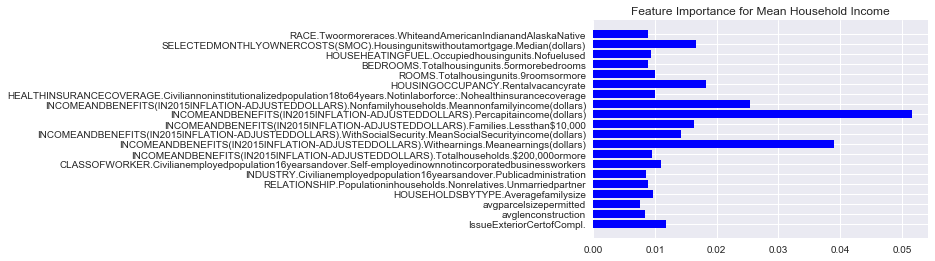

In [67]:
features=fsincome.columns[res > 0.0075]
coefficients=list(res[res > 0.0075])
n_features = fsincome.columns[res > 0.0075].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="blue")
plt.yticks(np.arange(n_features), features)
plt.title("Feature Importance for Mean Household Income")

# Crime

In [78]:
crime=df.drop(["2016totals","2016assault", "2016burglary", "2016larceny", "2016stolenvehicle", "2016robbery"],axis=1)
ycrim=y['2016totals']

In [79]:
ycrim.mean()

150.1352657004831

In [80]:
res=lasso(crime, ycrim, [1, 5])
fscrime=fs(crime, ycrim, res)
lr(fscrime, ycrim)
#feature selection

Best alpha: 5.0
Number of features used: 131
Root Mean Squared Error on train data: 7.669650462443166
Root Mean Squared Error on test data: 39.88528390679906
Mean Squared Error from Linear Regression without feature selection: 6551.086784165779
Mean Squared Error from Linear Regression: 6820.761198996204


array([  1.81877412e-04,   5.76132466e-03,  -1.45170246e-02,
        -5.51442993e-02,   2.52454748e-02,   6.92588285e-02,
        -1.35103352e-01,  -1.13491908e-01,   1.71172972e-01,
        -7.55453072e-02,  -4.23533027e-01,   1.54861862e-02,
        -2.43464020e-02,   2.31818707e-01,  -2.63145082e-01,
         4.87753265e-01,   1.28763211e+00,  -4.26034181e-01,
        -3.73844663e-01,   5.75422021e-01,  -1.22768707e+00,
        -9.40071119e-05,   3.05246856e-04,  -2.44690028e-04,
        -9.68985721e-02,   4.61857431e-01,   1.09115780e-01,
        -3.54328114e-01,  -3.02784925e-02,  -3.74063593e-02,
         2.48887654e-08,   6.27706130e-06,   1.37467687e-02,
        -7.48449598e-07,   3.95903214e-02,  -7.68250405e-01,
         4.49848232e-01,   1.56747809e-01,   6.22289914e-01,
        -5.37247159e-02,  -2.19892851e-01,   4.03158295e-01,
         2.78665415e-01,   8.13668717e-02,  -1.64739416e-01,
         7.95543924e-01,  -3.80676286e-02,   8.48997556e-02,
         3.52014807e-01,

In [81]:
res=gbr(fscrime, ycrim, [1,2,3,4,5], .75)

Root Mean Squared Error on train data: 2.8323436921143834
Root Mean Squared Error on test data: 35.45128560571354
The parameters are: 2


In [85]:
fscrime=fscrime.rename(columns={"FERTILITY.Numberofwomen15to50yearsoldwhohadabirthinthepast12months.Per1,000women15to19yearsold":"Birthsinlastyear15to19yearolds"})

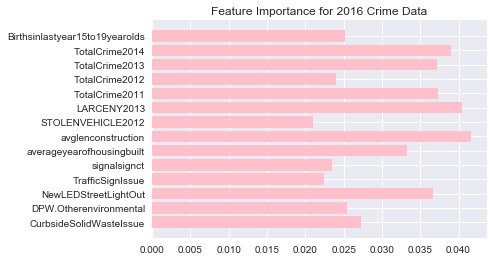

In [86]:
features=fscrime.columns[res > 0.02]
coefficients=list(res[res > 0.02])
n_features = fscrime.columns[res > 0.02].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="pink")
plt.yticks(np.arange(n_features), features)
plt.title("Feature Importance for 2016 Crime Data")

# Home Ownership

In [40]:
ho=df.drop(['MORTGAGESTATUS.Owner-occupiedunits'], axis=1)
yho=y['MORTGAGESTATUS.Owner-occupiedunits']
yho.mean()

503.2173913043478

In [43]:
res=lasso(ho, yho, [0.1, 1, 10])
fsho=fs(ho, yho, res)
lr(fsho, yho)

Number of features used: 145
Root Mean Squared Error on train data: 1.6159140627941415
Root Mean Squared Error on test data: 8.609390222748967
Mean Squared Error from Linear Regression without feature selection: 40.2914803266059
Mean Squared Error from Linear Regression: 13.401007203967074


array([  1.99364020e-15,   1.84516790e-13,  -6.65488714e-14,
        -2.34826481e-13,  -1.61322128e-13,   9.23846503e-13,
        -8.14175984e-13,   5.76795556e-16,  -1.82742276e-15,
         1.25333256e-13,  -9.97465999e-18,   1.63064007e-16,
         5.11774054e-14,  -2.73218947e-17,  -9.82475660e-13,
         4.55960934e-02,   3.06970118e-02,   2.68914321e-02,
         1.48990815e-02,  -2.73122522e-02,  -2.59225921e-03,
         2.02939164e-03,   1.27625370e-03,   4.55960934e-02,
         3.98791503e-03,  -2.72723856e-02,  -3.23332361e-03,
         2.27819485e-02,  -5.06418718e-03,  -1.70387732e-02,
        -4.44634667e-03,   2.15543850e-02,   4.35102393e-03,
        -1.25783547e-02,  -7.45991302e-04,  -2.69326684e-03,
         3.19353632e-03,   6.19514735e-03,   8.73271530e-04,
         7.75763227e-03,  -1.94308355e-03,  -5.87491529e-02,
         1.95006734e-02,  -2.83549268e-04,   2.76822565e-02,
         4.01549564e-03,   6.03304248e-03,  -1.47335713e-02,
         5.27113091e-03,

Root Mean Squared Error on train data: 0.007625552268224612
Root Mean Squared Error on test data: 4.8010501181371374
The parameters are: 3


([<matplotlib.axis.YTick at 0x2279266e908>,
 <a list of 14 Text yticklabel objects>)

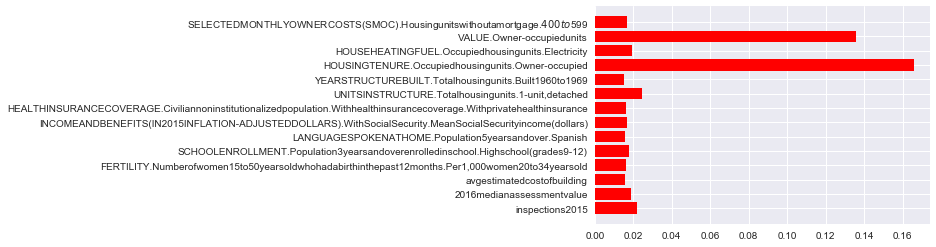

In [45]:
res=gbr(fsho, yho, [1,2,3,4,5], .75)
features=fsho.columns[res > 0.015]
coefficients=list(res[res > 0.015])
n_features = fsho.columns[res > 0.015].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="red")
plt.yticks(np.arange(n_features), features)

# Total Auctions

In [88]:
auct=df.drop(["TotalAuctions"], axis=1)
aucty=y["TotalAuctions"]

In [93]:
aucty.mean()

4.497584541062802

In [94]:
res=rfr(auct, aucty, [1,2,3,4,5, 6,7,8], [6,7,8, 9,10, 11, 12,13,14], [1,2,3,4,5,6], .75)


Root Mean Squared Error on train data: 4.355330534999539
Root Mean Squared Error on test data: 8.54984426243721
The parameters are: [4, 8, 2]


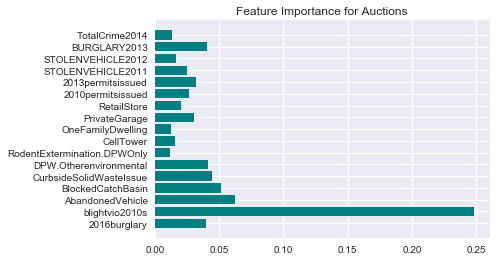

In [92]:
features=auct.columns[res > 0.01]
coefficients=list(res[res > 0.01])
n_features = auct.columns[res > 0.01].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="teal")
plt.yticks(np.arange(n_features), features)
plt.title("Feature Importance for Auctions")

# Improve Tickets

In [95]:
improv=df.drop(['improveticketsperneighborhood'], axis=1)
yimprov=y['improveticketsperneighborhood']

In [96]:
yimprov.mean()

884.6763285024155

In [97]:
res=lasso(improv, yimprov, [0.1, 1])
fsimprov=fs(improv, yimprov, res)

Best alpha: 1.0
Number of features used: 448
Root Mean Squared Error on train data: 4.895174367741679
Root Mean Squared Error on test data: 585.8867313506869
Mean Squared Error from Linear Regression without feature selection: 1080.937490995487


max value of max leaf nodes params
Root Mean Squared Error on train data: 462.25135913205304
Root Mean Squared Error on test data: 137.949777951731
The parameters are: [7, 13, 2]


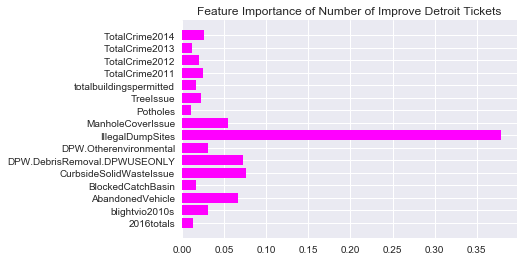

In [100]:
res=rfr(fsimprov, yimprov, [1,2,3,4,5,6,7,8], [5,6,7,8,9,10,11,12,13], [1,2,3], .75)
features=fsimprov.columns[res > 0.01]
coefficients=list(res[res > 0.01])
n_features = fsimprov.columns[res > 0.01].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="magenta")
plt.yticks(np.arange(n_features), features)
plt.title("Feature Importance of Number of Improve Detroit Tickets")

# Rent 

Built a model predicting rent, but seemed a bit outside scope of project.

In [83]:
rent=df.drop('GROSSRENT.Occupiedunitspayingrent.Median(dollars)', axis=1)
yrent=y['GROSSRENT.Occupiedunitspayingrent.Median(dollars)']

In [84]:
yrent.mean()

737.4154589371981

Root Mean Squared Error on train data: 0.0012292369539398304
Root Mean Squared Error on test data: 70.13566345805289
The parameters are: 5


([<matplotlib.axis.YTick at 0x227926362b0>,
 <a list of 10 Text yticklabel objects>)

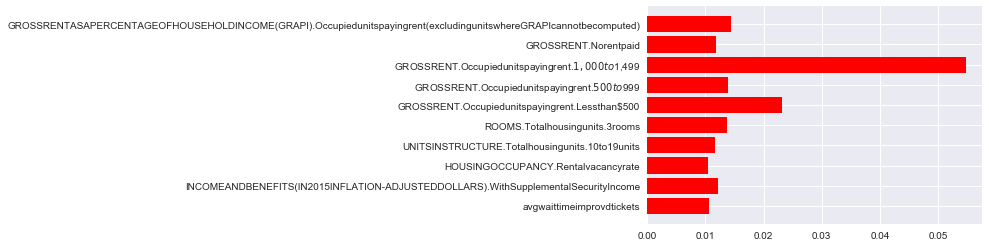

In [88]:
res=gbr(rent, yrent, [4,5,6,7], .8)
features=rent.columns[res > 0.01]
coefficients=list(res[res > 0.01])
n_features = rent.columns[res > 0.01].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="red")
plt.yticks(np.arange(n_features), features)

In [93]:
oy=pd.read_csv("othery.csv")
oy=oy.replace(np.nan, 0)

In [98]:
sales=bp
y2016=oy.SP2016
yavg=oy.postrecavg
y2017=oy.SP2017
print(yavg.mean())
print(y2016.mean())
print(y2017.mean())

99369.97154557053
132406.65362506773
175548.59735947347


In [102]:
wt=df.drop('avgwaittimeimprovdtickets', axis=1)
ywt=othery['avgwaittimeimprovdtickets']
yr=df.drop("averageyearofhousingbuilt", axis=1)
yyr=othery['averageyearofhousingbuilt']
con=df.drop("avglenconstruction", axis=1)
ycon=othery["avglenconstruction"]
cost=df.drop("avgestimatedcostofbuilding", axis=1)
ycost=othery["avgestimatedcostofbuilding"]
hom=df.drop("totalmurders", axis=1)
yhom=othery["totalmurders"]
inspect=df.drop("inspections2016", axis=1)
yinspect=othery["inspections2016"]

In [103]:
ywt.mean()

18.16663864365701

In [112]:
wt=wt.rename(columns={"INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Medianearningsformalefull-time,year-roundworkers(dollars)": "Median Earnings for Male Full Time Workers",
                     "INCOMEANDBENEFITS(IN2015INFLATION-ADJUSTEDDOLLARS).Families.$25,000to$34,999":"Familiesmaking25000-34999"
})

Root Mean Squared Error on train data: 2.864260201625337
Root Mean Squared Error on test data: 8.50389998120845
The parameters are: 1


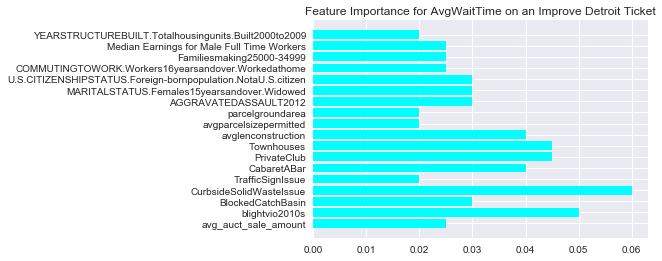

In [113]:
res=gbr(wt, ywt, [1,2,3,4,5], .75)
features=wt.columns[res > 0.015]
coefficients=list(res[res > 0.015])
n_features = wt.columns[res > 0.015].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="cyan")
plt.yticks(np.arange(n_features), features)
plt.title("Feature Importance for AvgWaitTime on an Improve Detroit Ticket")

# Homicides

In [115]:
res=gbr(hom, yhom, [1,2,3,4,5], .75)

Root Mean Squared Error on train data: 0.005769891832668183
Root Mean Squared Error on test data: 5.783756023762857
The parameters are: 4


In [119]:
hom=hom.rename(columns={"HOMICIDE20112011": "HOMICIDE2011"})

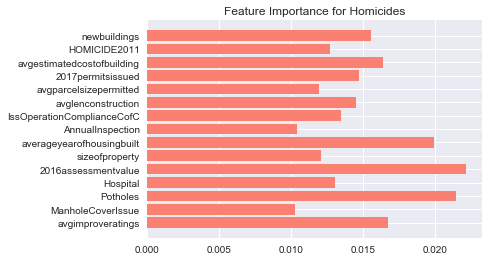

In [120]:
features=hom.columns[res > 0.01]
coefficients=list(res[res > 0.01])
n_features = hom.columns[res > 0.01].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="salmon")
plt.yticks(np.arange(n_features), features)
plt.title("Feature Importance for Homicides")

In [24]:
yhom.mean()

2.8550724637681157

Number of features used: 320
Root Mean Squared Error on train data: 2.509005295488852
Root Mean Squared Error on test data: 26.768513795166363


([<matplotlib.axis.YTick at 0x1eddec78630>,
 <a list of 14 Text yticklabel objects>)

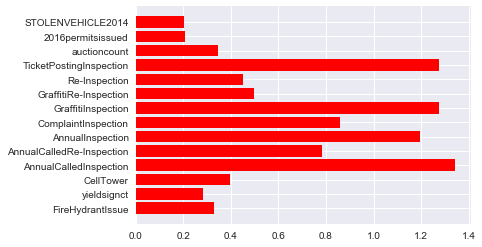

In [70]:
res=lasso(inspect, yinspect, [0.1, 1, 10])
features=inspect.columns[res > 0.2]
coefficients=list(res[res > 0.2])
n_features = inspect.columns[res > 0.2].values.shape[0]
plt.barh(range(n_features), coefficients, align="center", color="red")
plt.yticks(np.arange(n_features), features)

# Functions for modeling (since there's  a lot to model)

In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [12]:
def lasso(X, y, params):
    X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, train_size=.8)
    parameters={"alpha":params}
    las=Lasso(max_iter=1000000)
    model=GridSearchCV(las, parameters, cv=kfold, scoring="neg_mean_squared_error")
    model.fit(X_train, y_train)
    bestalpha=model.best_params_["alpha"]
    bestalpha=float(bestalpha)
    print("Best alpha: {}".format(bestalpha))
    l=Lasso(alpha=bestalpha, max_iter=100000, tol=0.001).fit(X_train, y_train)
    print("Number of features used: {}".format(np.sum(l.coef_!=0)))
    y_predtrain=l.predict(X_train)
    print("Root Mean Squared Error on train data: {}".format(sqrt(mean_squared_error(y_train, y_predtrain))))
    y_pred=l.predict(X_test)
    print("Root Mean Squared Error on test data: {}".format(sqrt(mean_squared_error(y_test, y_pred))))    
    return l.coef_

In [13]:
def lassomod(X, y, params, tol, max_iter):
    X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, train_size=.8)
    parameters={"alpha":params}
    las=Lasso(max_iter=1000000)
    model=GridSearchCV(las, parameters, cv=kfold, scoring="neg_mean_squared_error")
    model.fit(X_train, y_train)
    bestalpha=model.best_params_["alpha"]
    bestalpha=float(bestalpha)
    l=Lasso(alpha=bestalpha, max_iter=max_iter, tol=tol).fit(X_train, y_train)
    print("Number of features used: {}".format(np.sum(l.coef_!=0)))
    y_predtrain=l.predict(X_train)
    print("Root Mean Squared Error on train data: {}".format(sqrt(mean_squared_error(y_train, y_predtrain))))
    y_pred=l.predict(X_test)
    print("Root Mean Squared Error on test data: {}".format(sqrt(mean_squared_error(y_test, y_pred))))    
    return l.coef_

In [14]:
def fs(X, y, res):
    X_trainval, X_test, y_trainval, y_test=train_test_split(X, y, random_state=0)
    lr=LinearRegression().fit(X_trainval, y_trainval)
    y_pred=lr.predict(X_test)
    print("Mean Squared Error from Linear Regression without feature selection: {}".format(mean_squared_error(y_test, y_pred)))
    t=pd.DataFrame(list(zip(X.columns, res)))
    t=t[t[1] !=0]
    mask=t[0].tolist()
    for i in X.columns: 
        if i not in mask:
            X=X.drop(i, axis=1)
    return X
    

In [15]:
def lr(X, y):
    X_trainval, X_test, y_trainval, y_test=train_test_split(X, y, random_state=0)
    lr=LinearRegression().fit(X_trainval, y_trainval)
    y_pred=lr.predict(X_test)
    print("Mean Squared Error from Linear Regression: {}".format(mean_squared_error(y_test, y_pred)))
    return lr.coef_

In [16]:
def ridge(X, y, params):
    X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, train_size=.7)
    parameters={"alpha":params}
    las=Ridge()
    model=GridSearchCV(las, parameters, cv=kfold, scoring="neg_mean_squared_error")
    model.fit(X_train, y_train)
    bestalpha=model.best_params_["alpha"]
    bestalpha=float(bestalpha)
    ridge=Ridge(alpha=bestalpha, max_iter=100000, tol=0.1).fit(X_train, y_train)
    print("Number of features used: {}".format(np.sum(ridge.coef_!=0)))
    y_predtrain=ridge.predict(X_train)
    print("Root Mean Squared Error on train data: {}".format(sqrt(mean_squared_error(y_train, y_predtrain))))
    y_pred=ridge.predict(X_test)
    print("Root Mean Squared Error on test data: {}".format(sqrt(mean_squared_error(y_test, y_pred))))


In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
def dtr(X, y, mdparams, mlnparams, mslparams):
    X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, train_size=.7)
    parameters={"max_depth":mdparams, "max_leaf_nodes":mlnparams, "min_samples_leaf": mslparams}
    dt=DecisionTreeRegressor()
    model=GridSearchCV(dt, parameters, cv=kfold, scoring="neg_mean_squared_error")
    model.fit(X_train, y_train)
    bestmd=model.best_params_["max_depth"]
    bestmln=model.best_params_["max_leaf_nodes"]
    bestmsl=model.best_params_["min_samples_leaf"]
    if bestmd == min(mdparams):
        print("min value of max_depth params")
    if bestmln== min(mlnparams):
        print("min value of max_leaf_nodes params")
    if bestmsl==min(mslparams):
        print("min value of min_samples_leafs params")
    if bestmd==max(mdparams):
        print("max value of max depth params")
    if bestmln==max(mlnparams):
        print("max value of max leaf nodes params")
    if bestmsl==max(mslparams):
        print("max value of min samples leafs params")
    tree=DecisionTreeRegressor(max_depth=bestmd, max_leaf_nodes=bestmln, min_samples_leaf=bestmsl).fit(X_train, y_train)
    y_predtrain=tree.predict(X_train)
    print("Root Mean Squared Error on train data: {}".format(sqrt(mean_squared_error(y_train, y_predtrain))))
    y_pred=tree.predict(X_test)
    print("Root Mean Squared Error on test data: {}".format(sqrt(mean_squared_error(y_test, y_pred))))


In [19]:
from sklearn.svm import SVR
def svr(X, y, C, epsilon, gamma):
    X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, train_size=.8)
    parameters={"C":C, "epsilon": epsilon, "gamma":gamma}
    svr=SVR()
    model=GridSearchCV(svr, parameters, cv=kfold, scoring="neg_mean_squared_error")
    model.fit(X_train, y_train)
    bestC=model.best_params_["C"]
    beste=model.best_params_["epsilon"]
    bestgamma=model.best_params_["gamma"]
    svr=SVR(C=bestC, epsilon=beste, gamma=bestgamma).fit(X_train, y_train)
    return svr.dual_coef_
    y_predtrain=svr.predict(X_train)
    print("Root Mean Squared Error on train data: {}".format(sqrt(mean_squared_error(y_train, y_predtrain))))
    y_pred=svr.predict(X_test)
    print("Root Mean Squared Error on test data: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
    print("The parameters are: {}".format([bestC, beste, bestgamma]))

    

In [20]:
from sklearn.ensemble import RandomForestRegressor
def rfr(X, y, mdparams, mlnparams, mslparams, train):
    X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, train_size=train)
    parameters={"max_depth":mdparams, "max_leaf_nodes":mlnparams, "min_samples_leaf": mslparams}
    rf=RandomForestRegressor(n_estimators=50)
    model=GridSearchCV(rf, parameters, cv=kfold, scoring="neg_mean_squared_error", n_jobs=3)
    model.fit(X_train, y_train)
    bestmd=model.best_params_["max_depth"]
    bestmln=model.best_params_["max_leaf_nodes"]
    bestmsl=model.best_params_["min_samples_leaf"]
    if bestmd == min(mdparams):
        print("min value of max_depth params")
    if bestmln== min(mlnparams):
        print("min value of max_leaf_nodes params")
    if bestmsl==min(mslparams):
        print("min value of min_samples_leafs params")
    if bestmd==max(mdparams):
        print("max value of max depth params")
    if bestmln==max(mlnparams):
        print("max value of max leaf nodes params")
    if bestmsl==max(mslparams):
        print("max value of min samples leafs params")
    r=RandomForestRegressor(n_estimators=200,max_depth=bestmd, max_leaf_nodes=bestmln, min_samples_leaf=bestmsl).fit(X_train, y_train)
    y_predtrain=r.predict(X_train)
    print("Root Mean Squared Error on train data: {}".format(sqrt(mean_squared_error(y_train, y_predtrain))))
    y_pred=r.predict(X_test)
    print("Root Mean Squared Error on test data: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
    print("The parameters are: {}".format([bestmd, bestmln, bestmsl]))
    return r.feature_importances_

In [ ]:
rfr(bv, y.blightvio2010s, [1,2,3,4,5], [2,3,4,5,6,7,], [1,2,3])
gbr(bv, y.blightvio2010s, [1,2,3,4,5])
svr(bv, y.blightvio2010s, [0.0001, 0.001, 0.01, 0.1, 1,10], [0.0001, 0.001, 0.01, 0.1, 1,10], [0.000001, 0.0001, 0.001, 0.01, 0.1, 1])
dtr(bv, y.blightvio2010s, [1,2,3,4,5], [2,3,4,5], [1,2,3])

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
def gbr(X, y, max_depth, train):
    X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, train_size=train)
    parameters={"max_depth":max_depth}
    gb=GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=0, loss='ls')
    model=GridSearchCV(gb, parameters, cv=kfold, scoring="neg_mean_squared_error", n_jobs=3)
    model.fit(X_train, y_train)
    bestmd=model.best_params_["max_depth"]
    gb=GradientBoostingRegressor(n_estimators=200,max_depth=bestmd, learning_rate=0.1, random_state=0, loss='ls').fit(X_train, y_train)
    y_predtrain=gb.predict(X_train)
    print("Root Mean Squared Error on train data: {}".format(sqrt(mean_squared_error(y_train, y_predtrain))))
    y_pred=gb.predict(X_test)
    print("Root Mean Squared Error on test data: {}".format(sqrt(mean_squared_error(y_test, y_pred))))
    print("The parameters are: {}".format(bestmd))
    return gb.feature_importances_

In [ ]:
gbr(bv, y.blightvio2010s, [1,2,3,4,5])